In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/auto/Cancer_Data.csv")

print("Primeras filas del dataset:", df.head())

print("Información del dataset:")
print(df.info())

#Eliminar  la columna vacía 32
df = df.drop(columns=["Unnamed: 32"])

print("Dataset después de eliminar la columna vacía:")
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras filas del dataset:          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414        

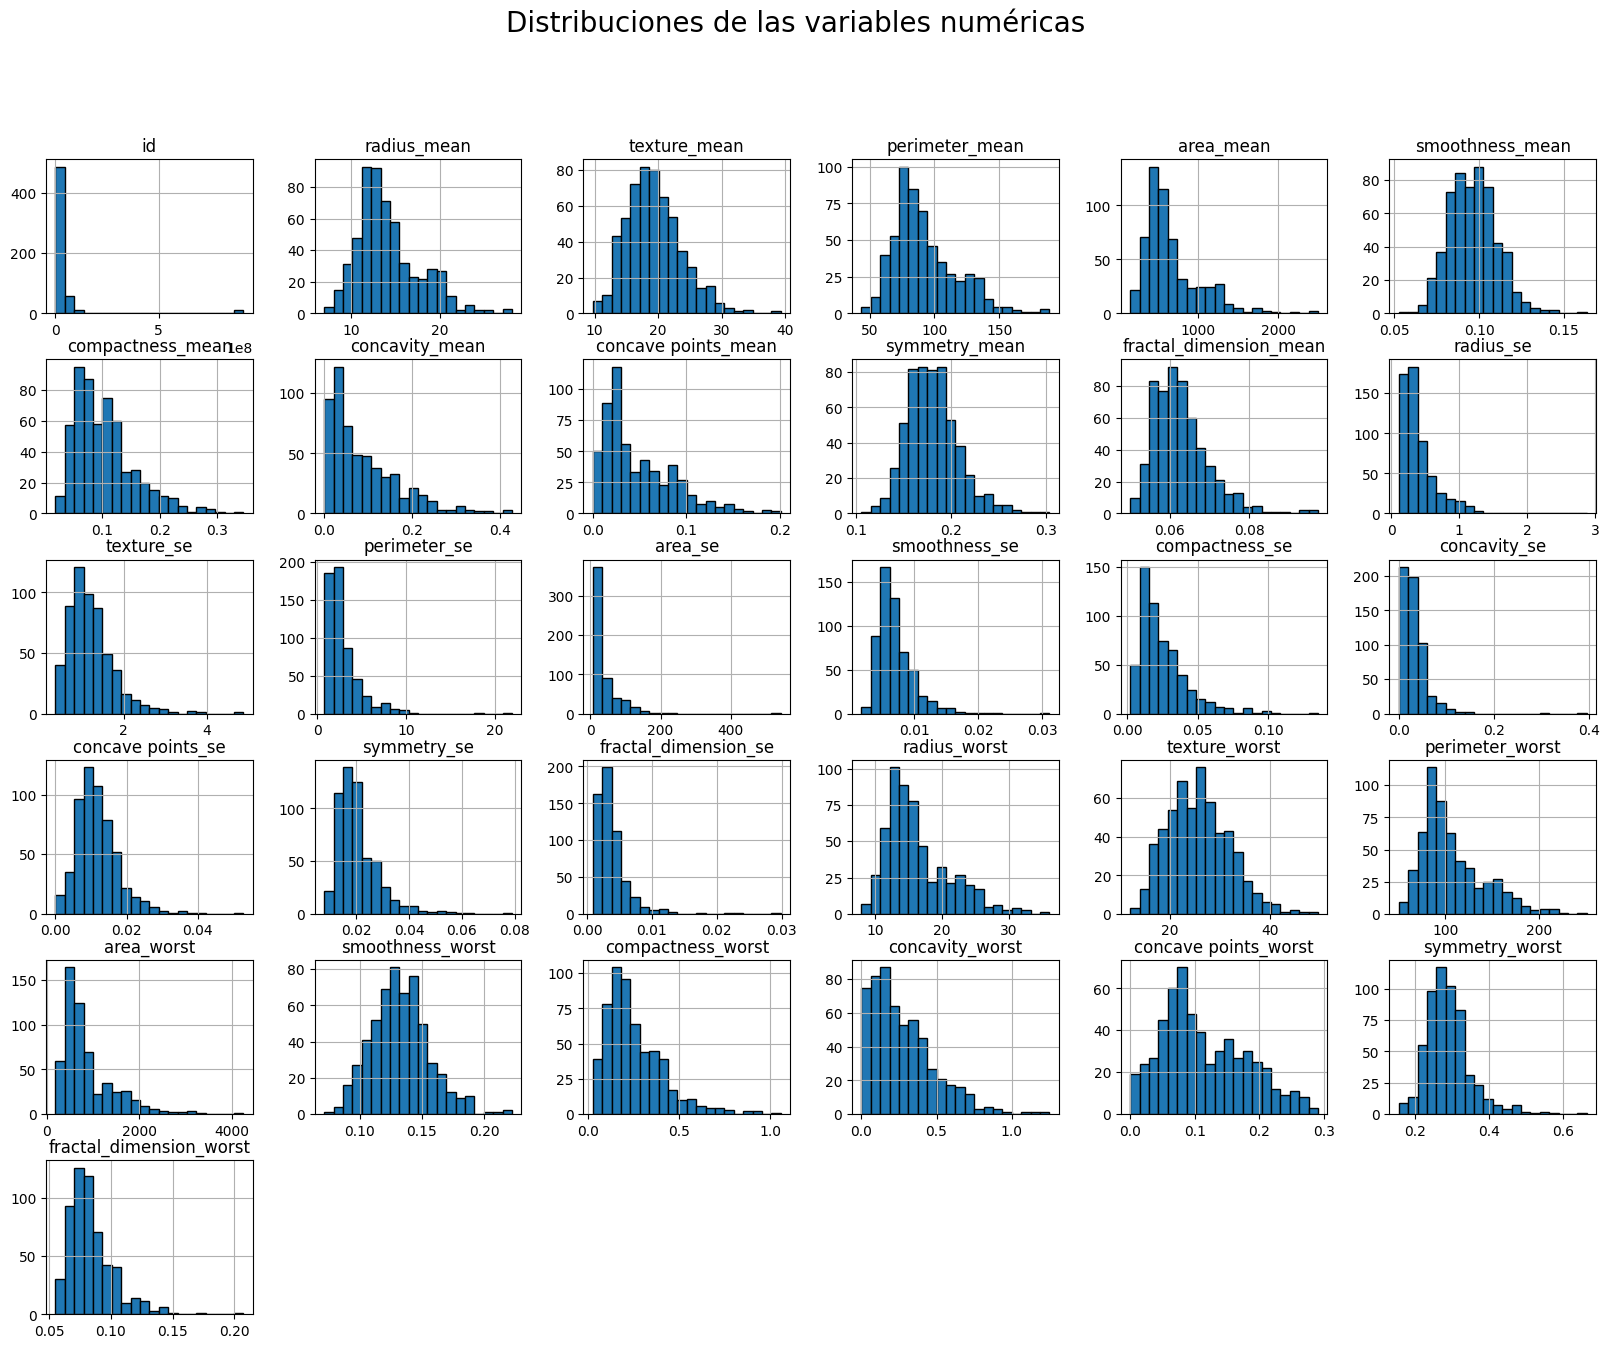

In [131]:
#Seleccionamos las columnas con variables numéricas
VarNum = df.select_dtypes(include=np.number).columns

#Graficamos como son las distribuciones de cada una de esas columnas
df[VarNum].hist(bins=20, edgecolor="black", figsize=(20, 15))
plt.suptitle("Distribuciones de las variables numéricas", size=20)
plt.show()


Conocer la distribución de las variables permite identificar valores atípicos, decidir transformaciones o escalado, eliminar features irrelevantes, y elegir el modelo adecuado, mejorando así el rendimiento y la precisión del aprendizaje automático.


In [132]:
#ESTADISTICAS DESCRIPTIVAS
num = df.select_dtypes(include="number") #incluimos filas
tabla = num.describe()
tabla


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Los estadísticos descriptivos nos permiten entender cómo se distribuyen los datos de cada variable antes de entrenar un modelo de machine learning. Por ejemplo, al observar la media, la mediana (50%) y los percentiles (25% y 75%) podemos identificar la tendencia central y la dispersión de las variables. Variables como radius_mean, perimeter_mean y area_mean muestran valores máximos mucho mayores que la media, lo que indica la presencia de valores extremos o outliers. El rango (mínimo y máximo) y la desviación estándar reflejan la variabilidad de cada característica, información clave para decidir si necesitamos normalizar o escalar los datos antes del entrenamiento. Estos estadísticos también ayudan a detectar inconsistencias, que podrían aportar poca información al modelo y afectar su desempeño.



                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

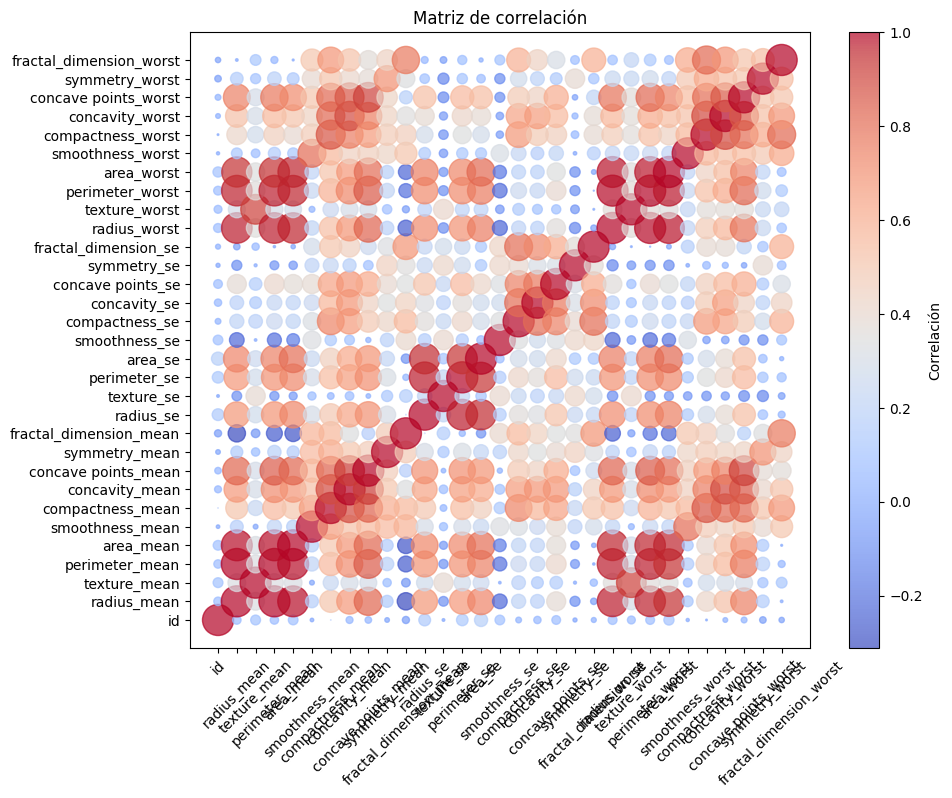

In [133]:
#USAMOS LA MATRIZ DE RELACIÓN PARA CALCULAR LA CORRELACIÓN
matrix = num.corr()
print(matrix)
#PPONEMOS LA MATRIZ EN FORMATO LARGO PARA EVITAR ERRORES EN ESTE TIPO DE GRÁFICO
corr_long = matrix.stack().reset_index()
corr_long.columns = ['Var1', 'Var2', 'Correlacion'] #Se crea un dataframe donde cada fila es un par de variables y su relación

#GRÁFICO
plt.figure(figsize=(10,8))
scatter = plt.scatter(
    x=corr_long['Var1'],
    y=corr_long['Var2'],
    s=abs(corr_long['Correlacion'])*500,  # tamaño según magnitud
    c=corr_long['Correlacion'],            # color según valor
    cmap='coolwarm',
    alpha=0.7
)
plt.colorbar(scatter, label='Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title( 'Matriz de correlación')
plt.show()



La matriz de correlación muestra cómo se relacionan entre sí las variables numéricas del dataset. Por ejemplo, en nuestro caso, se observa que variables como radius_mean, perimeter_mean y area_mean tienen correlaciones muy altas entre ellas (cercanas a 1), lo que indica que aumentan o disminuyen juntas. Esto aporta información valiosa para el aprendizaje automático, porque nos permite identificar variables redundantes que podrían generar multicolinealidad y afectar la estabilidad de algunos modelos. Por otro lado, variables con baja correlación entre sí, como fractal_dimension_mean y radius_mean, aportan información única y diversa, ayudando a que el modelo capture patrones distintos. El análisis de la matriz también facilita priorizar características más relevantes y diseñar estrategias de selección de variables o escalamiento, lo que contribuye a mejorar el desempeño y la interpretabilidad del modelo de ML.

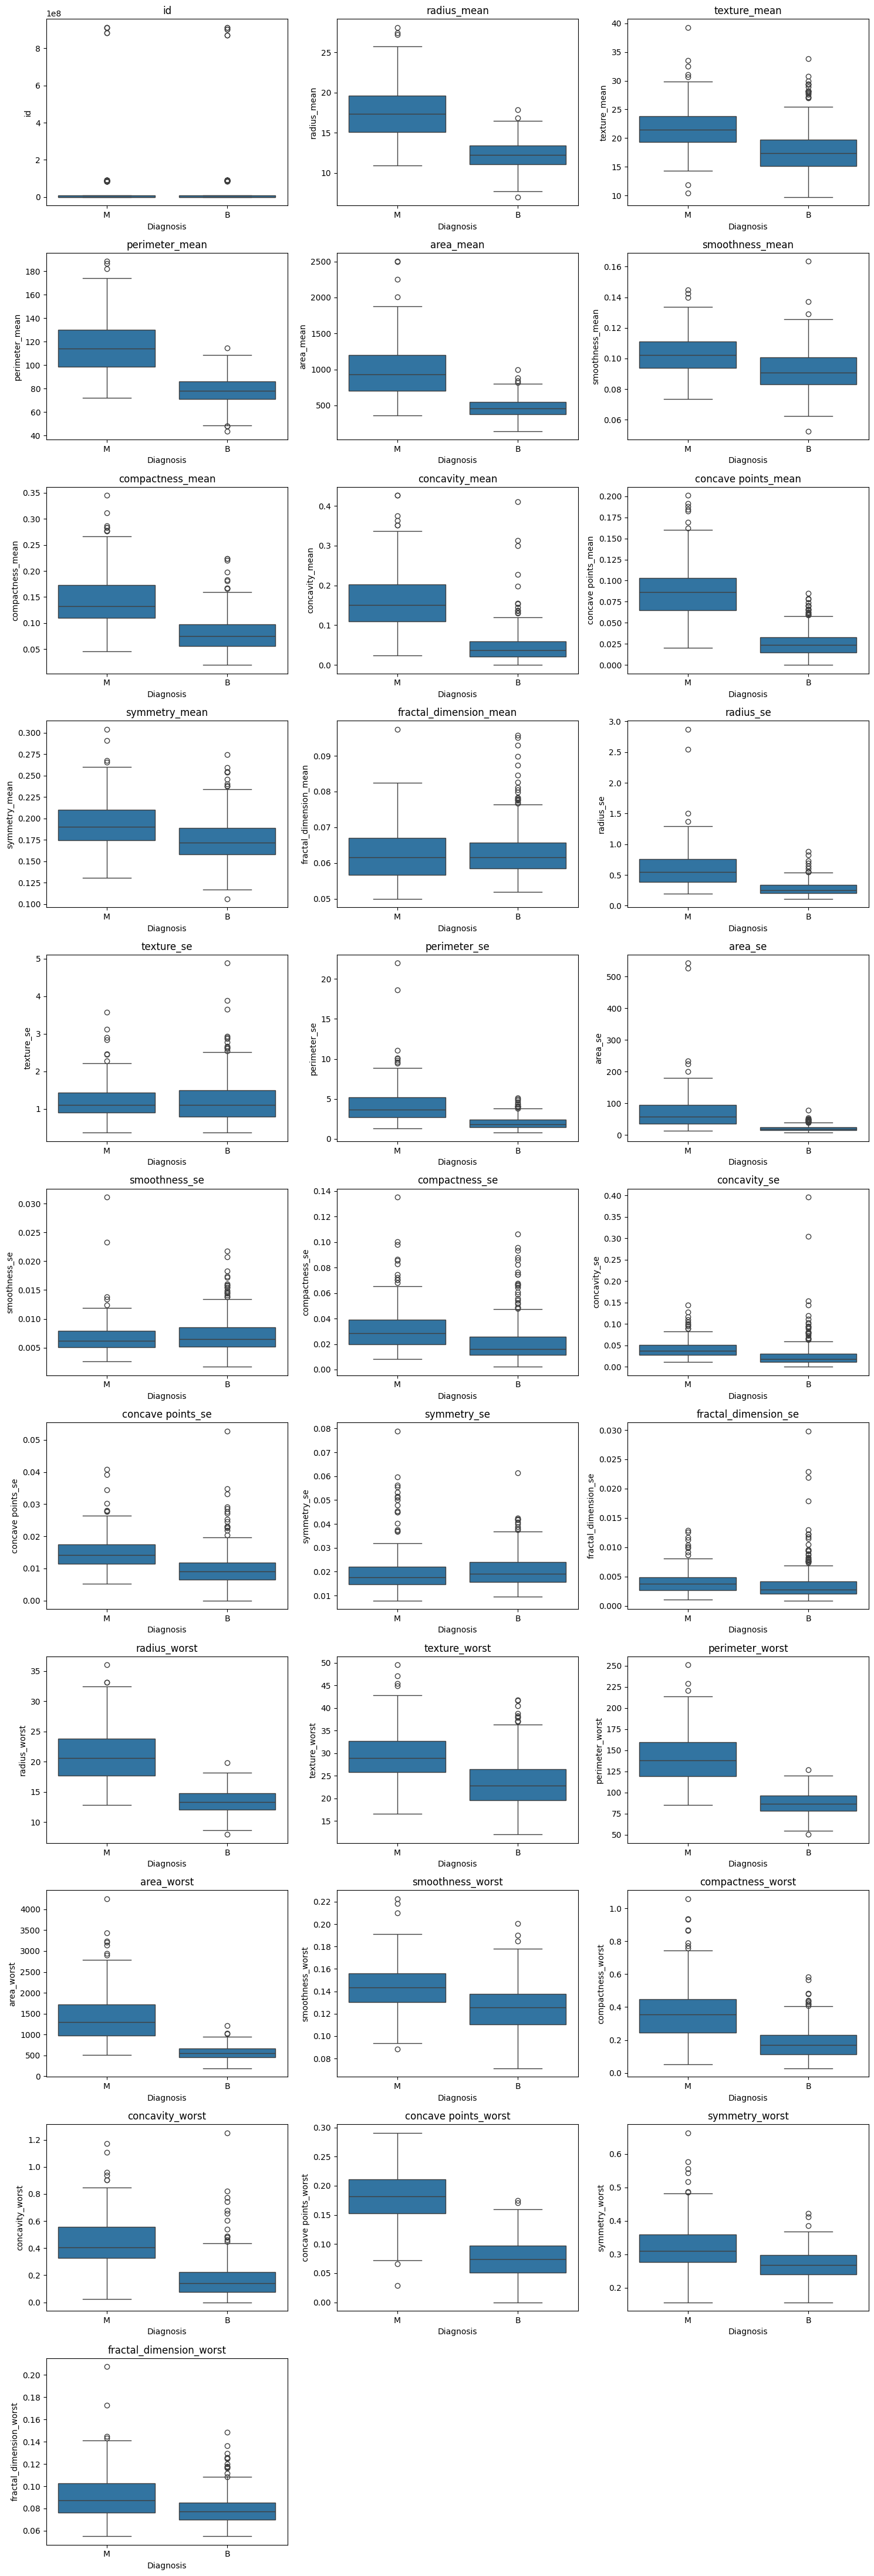

In [134]:
#Relación entre el target y las variables predictoras
predictors = num.columns
target = df['diagnosis']
#
# Configuración de la figura
n_cols = 3  # número de columnas en el grid
n_rows = (len(predictors) + n_cols - 1) // n_cols  # calcular filas necesarias
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(predictors):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=target, y=num[col])
    plt.xlabel('Diagnosis')
    plt.ylabel(col)
    plt.title(col)

plt.tight_layout()
plt.show()

El diagrama de cajas muestra la relación que tiene cada una de las características (Columnas) con el target (Maligno o Benigno), con esta relación se puede identificar las varibles que podrían ser clave a la hora de ubicar la predicción en M o B.

In [135]:
#PROCESAMIENTO
#Anteriormente se eliminó la columna vacía
# Revisar valores nulos
print(df.isnull().sum())
#no tenemos valores nulos



id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [143]:
#PIPELINE
X = df[VarNum]  # columnas numéricas como features
y = df['diagnosis'] # establecemos y como el target
y = y.map({'B': 0, 'M': 1}).astype(int) #cambiamos las clasificaciones a valores numericos

from sklearn.model_selection import train_test_split
# División en train / validation / test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
) #divido 70%train y 30%extra

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
) #divido extra el 15% val 15% test

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (398, 31), Val: (85, 31), Test: (86, 31)


In [144]:
#ESCALAMIENTO
from sklearn.compose import ColumnTransformer #función que nos permite transformar distintas columnas para su escalado
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pipeline de escalado
preproces = ColumnTransformer([
    ('num', StandardScaler(), VarNum)
]) # Con el pipeline de escalado normalizamos los datos para evitar cesgos (media=0, desviación=1)

# Aplicar escalado
X_train = preproces.fit_transform(X_train)
X_val = preproces.transform(X_val)
X_test = preproces.transform(X_test)

In [145]:
#ENTRENAMIENTO (exportamos las funciones necesarias)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
#KNN

knn = KNeighborsClassifier(n_neighbors=5) #establecemos el numero de neighors y llamamos el modelo
knn.fit(X_train, y_train)

#Entregamos los grupos al modelo
y_train_knn = knn.predict(X_train)
y_val_knn = knn.predict(X_val)
y_test_knn = knn.predict(X_test)

# Accuracy, calculo los tres para ver que tal aprendió, se ajustó y evaluó
acc_knn = {
    'Train': accuracy_score(y_train, y_train_knn),
    'Val': accuracy_score(y_val, y_val_knn),
    'Test': accuracy_score(y_test, y_test_knn)
}
print(acc_knn)


{'Train': 0.9723618090452262, 'Val': 0.9647058823529412, 'Test': 0.9651162790697675}


In [146]:
#RANDOM FOREST
rf = RandomForestClassifier(n_estimators=100, random_state=42) #establecemos el numero de árboles y la semilla
rf.fit(X_train, y_train) #entrenamos

y_train_rf = rf.predict(X_train)
y_val_rf = rf.predict(X_val)
y_test_rf = rf.predict(X_test)

acc_rf = {
    'Train': accuracy_score(y_train, y_train_rf),
    'Val': accuracy_score(y_val, y_val_rf),
    'Test': accuracy_score(y_test, y_test_rf)
}
print(acc_rf)

{'Train': 1.0, 'Val': 0.9647058823529412, 'Test': 0.9767441860465116}


In [147]:
#DNN
# Definir modelo
dnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #Primera capa con 64 neuronas y función de activación ReLU
    Dropout(0.2), #capa de regularización
    Dense(32, activation='relu'), #Segunda capa con 32 neuronas y función de activación ReLU
    Dropout(0.2), #capa de regularización
    Dense(16, activation='relu'), #Tercera capa con 16 neuronas, activación ReLU
    Dense(1, activation='sigmoid')  # salida con activación sifgmoide, entrega una salida binaria y una estimación.
])

# Compilar
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar
history = dnn.fit(X_train, y_train,
                  validation_data=(X_val, y_val),
                  epochs=50, batch_size=16, verbose=0) #acomodamos epocas y numero de muestras por actualización de esos

# Evaluar
train_loss, train_acc = dnn.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = dnn.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = dnn.evaluate(X_test, y_test, verbose=0)

acc_dnn = {'Train': train_acc, 'Val': val_acc, 'Test': test_acc}
print(acc_dnn)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{'Train': 1.0, 'Val': 0.9647058844566345, 'Test': 0.9883720874786377}


In [148]:
# Creamos un dataframe para nuestra tabla
resultados = pd.DataFrame({
    'kNN': acc_knn,
    'Random Forest': acc_rf,
    'DNN': acc_dnn
}).T  # Transponer

resultados.index.name = 'Modelo'
resultados.reset_index(inplace=True)
resultados


,Modelo,Train,Val,Test
0,kNN,0.972362,0.964706,0.965116
1,Random Forest,1.000000,0.964706,0.976744
2,DNN,1.000000,0.964706,0.988372


B. Respecto a la tabla:

Mejor desempeño: El modelo **DNN** mostró el mayor rendimiento en el conjunto de prueba (Test = 0.988), Esto indica que predice con mayor precisión.

Overfitting o underfitting:El **Random Forest y  DNN** tienen accuracy de 1.0 en Train, lo que sugiere un ligero **overfitting**; es decir, aprendieron demasiado los datos de entrenamiento. Sin embargo, la diferencia con los datos de validación y prueba es mínima, por lo que el overfitting no es grave. El kNN no presenta overfitting, ya que sus valores de Train, Val y Test son más consistentes y cercanos.

Selección para producción: Seleccionaría  **DNN**, porque además de su alto accuracy en Test, mantiene buen desempeño en validación y entrenamiento.


In [149]:
#MUESTRA ARTIFICIAL
paciente_prueba = {
    'radius_mean': [14.0],
    'texture_mean': [20.0],
    'perimeter_mean': [92.0],
    'area_mean': [650.0],
    'smoothness_mean': [0.1],
    'compactness_mean': [0.1],
    'concavity_mean': [0.08],
    'concave points_mean': [0.05],
    'symmetry_mean': [0.18],
    'fractal_dimension_mean': [0.08],
    'radius_se': [0.4],
    'texture_se': [1.0],
    'perimeter_se': [2.0],
    'area_se': [30.0],
    'smoothness_se': [0.01],
    'compactness_se': [0.02],
    'concavity_se': [0.03],
    'concave points_se': [0.01],
    'symmetry_se': [0.02],
    'fractal_dimension_se': [0.004],
    'radius_worst': [15.0],
    'texture_worst': [25.0],
    'perimeter_worst': [100.0],
    'area_worst': [700.0],
    'smoothness_worst': [0.12],
    'compactness_worst': [0.15],
    'concavity_worst': [0.2],
    'concave points_worst': [0.1],
    'symmetry_worst': [0.3],
    'fractal_dimension_worst': [0.09]
}

pacientedf = pd.DataFrame(paciente_prueba)
pacientedf
pacientedf['id'] = 0  # valor arbitrario ya que el preprocesamiento que usamos para escalar incluye esa columna

# Transformar la muestra artificial usando el mismo preprocesamiento que establecimos en el pipeline
paciente_prueba = preproces.transform(pacientedf)



#DNN

prediction_prob = dnn.predict(paciente_prueba)[0][0]
prediction_clase = int(prediction_prob > 0.5)

print(f"Probabilidad de maligno: {prediction_prob:.2f}")
print(f"Predicción final (0=benigno, 1=maligno): {prediction_clase}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Probabilidad de maligno: 0.00
Predicción final (0=benigno, 1=maligno): 0


Resultado:
Probabilidad de maligno: 0.00
Predicción final: 0, es decir benigno
Esto tiene sentido porque los valores de la muestra artificial que usamos esta muy cercanos a la media de las muestras benignas según los estadísticos descriptivos que obtuvimos anteriormente
radius_mean, perimeter_mean, area_mean en valores normales
concavity, concave points en valores bajos
smoothness, symmetry en valores normales

El modelo interpreta esta combinación como características de un tumor benigno, por eso predice 0 con probabilidad 0 de maligno.
¿Qué pasaría si cambiamos una o más variables en la muestra?
Si aumentamos valores asociados a malignidad (por ejemplo: radius_mean, perimeter_mean, concavity_worst, concave points_worst), la probabilidad de maligno aumentaría o incluso el modelo podría clasificarlo como maligno.

